In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from photutils.aperture import aperture_photometry, CircularAperture, CircularAnnulus, EllipticalAperture
from astropy.wcs import WCS
from astropy.io import fits
from astropy.coordinates import SkyCoord
import sep
from matplotlib.patches import Ellipse
from astropy.stats import sigma_clipped_stats
from astropy.stats import mad_std
import scipy.odr as odr

In [36]:
im_test='./WCS_Solved/NGC3016/NGC3016_B.fits'
image=fits.open(im_test)[0].data
hdr=fits.open(im_test)[0].header
wcs=WCS(hdr)
data=image.byteswap().newbyteorder()
targets={'NGC3705': SkyCoord("11:30:07 +09:16:36",unit=('hourangle,deg')),
         'MCG05': SkyCoord("17:06:55 +30:16:11",unit=('hourangle,deg')),
         'MCG06': SkyCoord("12:12:05 +32:44:06",unit=('hourangle,deg')),
         'UGC9374': SkyCoord("14:33:59 +40:14:40",unit=('hourangle,deg')),
         'NVSSJ09': SkyCoord("09:24:57 +40:23:59",unit=('hourangle,deg')),
         'NGC6365A': SkyCoord("17:22:44 +62:09:58",unit=('hourangle,deg')),
         'NGC3016': SkyCoord("09:49:51 +12:41:43",unit=('hourangle,deg'))}
target=im_test.split('/')[-2]
target_x,target_y=wcs.world_to_pixel(targets[target])


In [37]:
references=np.transpose(np.genfromtxt(f'./Reference_Cats/Ref_{target}.csv',delimiter=',',skip_header=1,filling_values=np.NaN))
print(references[16][22])
masked=[]
full_masked=[]
for ind in range(0,len(references[0])):
    if np.isnan(references[16][ind]) or np.isnan(references[19][ind]) or np.isnan(references[4][ind]) or np.isnan(references[7][ind]):
        full_masked.append(ind)
        print('test',ind)
        continue
    c=SkyCoord(ra=references[0][ind],dec=references[2][ind],unit='deg')
    ap_size=3
    test_x_ind,test_y_ind=wcs.world_to_pixel(c)
    test_x_ind_int=int(test_x_ind)
    test_y_ind_int=int(test_y_ind)
    if test_x_ind<20 or test_y_ind<20 or test_x_ind>image.shape[1]-20 or test_y_ind>image.shape[0]-20 or image[test_y_ind_int,test_x_ind_int]>100_000 or ind in masked:
        full_masked.append(ind)
        print(ind)
        continue
    size=15
    plt.plot(range(test_y_ind_int-size,test_y_ind_int+size),image[test_y_ind_int-size:test_y_ind_int+size,test_x_ind_int])
    plt.axvline(x=test_y_ind,color='r',ls='--')
    plt.axvline(x=test_y_ind-ap_size,color='black',ls='--')
    plt.axvline(x=test_y_ind+ap_size,color='black',ls='--')
    plt.savefig(f'./Diagnostics/{ind}.png')
    plt.close()
positions=[]
for ind,(ra,dec) in enumerate(zip(references[0],references[2])):
    if ind not in full_masked:
        positions.append(wcs.world_to_pixel(SkyCoord(ra=ra,dec=dec,unit='deg')))
r_mags=references[16]
dr_mags=references[17]
i_mags=references[19]
di_mags=references[20]
V_mags=references[4]
dV_mags=references[5]
B_mags=references[7]
dB_mags=references[8]
R_mags=[]
dR_mags=[]
a=-0.153
b=0.117
da=0.003
db=0.03
for r,dr,i,di in zip(r_mags,dr_mags,i_mags,di_mags):
   R=a*(r-i)-b+r
   dR=np.sqrt(((r-i)**2)*da**2+db**2+((a+1)*dr)**2+(a*di)**2)
   R_mags.append(R)
   dR_mags.append(dR)
Reduced_R_mags=[R_mags[ind] for ind in range(len(R_mags)) if ind not in full_masked]
Reduced_dR_mags=[dR_mags[ind] for ind in range(len(R_mags)) if ind not in full_masked]
Reduced_B_mags=[B_mags[ind] for ind in range(len(B_mags)) if ind not in full_masked]
Reduced_V_mags=[V_mags[ind] for ind in range(len(V_mags)) if ind not in full_masked]
Reduced_dB_mags=[dB_mags[ind] for ind in range(len(dB_mags)) if ind not in full_masked]
Reduced_dV_mags=[dV_mags[ind] for ind in range(len(dV_mags)) if ind not in full_masked]
if hdr['FILTER']=='R':
    Ref_mags=Reduced_R_mags
    dRef_mags=Reduced_dR_mags
if hdr['FILTER']=='B':
    Ref_mags=Reduced_B_mags
    dRef_mags=Reduced_dB_mags
if hdr['FILTER']=='V':
    Ref_mags=Reduced_V_mags
    dRef_mags=Reduced_dV_mags
def Linfunc(beta,x):
    return x+beta[0]

16.655
0
1
test 2
3
4
5
test 6
7
8
test 9
10
test 11
12
test 13
14
15
test 16
17
test 18
test 19
20
21
22
test 23
24
25
26
27
test 28
29
test 30
31
test 32
33
34
35
test 36
test 37
test 38
test 39
40
test 41
42
43
44
test 45
46
47
test 48
49
50
test 51
52
53
54
55
56
test 57
58
test 59
60
test 61
62
63
test 64
65
66
test 67
68
69
70
71
test 72
73
74
75
76
77
78
test 79
test 80
81
test 82
test 83
test 84
85
test 86
87
88
test 89
test 90
91
92
93
97
98
99
100
test 101
test 104
105
test 106
test 107
108
109
110
test 111
113
test 114
116
test 120
121
122
test 124
125
126
127
129
131
test 134
137
test 138
test 141
143
145
147
test 148
149
test 150
test 151
test 153
test 154
155
156
157
test 159
test 163
164
test 165
167
168
test 169
170
test 171
173
175
test 177
178
179
182
test 183
test 188
190
test 191
192
test 193
195
197
198
test 202
203
204
test 205
206
208
210
213
215
test 217
test 218
219
221
222
test 224
226
227
229
230
233
234
235
236
239
240
241
243
test 244
test 246
248
249
test 

In [38]:
bkg = sep.Background(data)
data_sub=data-bkg.globalback
#objects,seg_map = sep.extract(data_sub, 5, err=bkg.globalrms,segmentation_map=True)
objects,seg_map = sep.extract(data_sub, 5, err=bkg.globalrms,segmentation_map=True,deblend_cont=1)#use if no blending wanted
dists=np.sqrt((objects['x']-target_x)**2+(objects['y']-target_y)**2)
obj=np.argmin(dists)
#print(objects[obj])
x=objects['x'][obj]
y=objects['y'][obj]
a=objects['a'][obj]
b=objects['b'][obj]
theta=objects['theta'][obj]
obj_seg=seg_map[int(y),int(x)]
bkg_mask=np.zeros(data.shape,dtype=bool)
masked_pixels=0
for i in range(len(data)):
    for j in range(len(data[i])):
        if seg_map[i][j]!=0:
            bkg_mask[i][j]=True
            masked_pixels+=1
newbkg=sep.Background(data,mask=bkg_mask)
bkg_mean,bkg_med,bkg_std=sigma_clipped_stats(newbkg,sigma=2)
print(bkg_mean,bkg_med,bkg_std)

44.36624685041374 44.38249588012695 0.2511342237100554


# Galaxy Diagnostics #

(716.0, 1116.0)

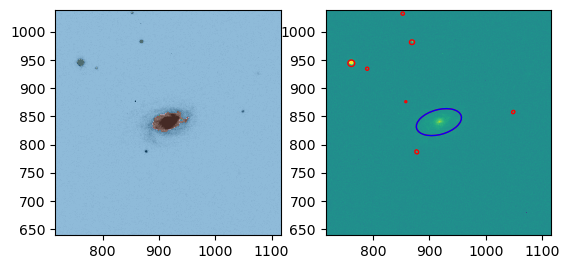

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image,vmin=bkg_med,vmax=2*bkg_med,cmap='Greys')
ax1.imshow(seg_map,vmin=obj_seg-1,vmax=obj_seg+1,cmap='tab20',alpha=0.5)
ax1.set_ylim(int(y)-200,int(y)+200)
ax1.set_xlim(int(x)-200,int(x)+200)
m, s = np.mean(data_sub), np.std(data_sub)
im = ax2.imshow(data_sub, interpolation='nearest', cmap='viridis',
               vmin=m-s, vmax=m+s, origin='lower')
areas=[]
# plot an ellipse for each object
for i in range(len(objects)):
    areas.append(np.pi*objects['a'][i]*objects['b'][i])
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax2.add_artist(e)
e1 = Ellipse(xy=(objects['x'][obj], objects['y'][obj]),
                width=6*objects['a'][obj],
                height=6*objects['b'][obj],
                angle=objects['theta'][obj] * 180. / np.pi)
e1.set_facecolor('none')
e1.set_edgecolor('blue')
ax2.add_artist(e1)
plt.ylim(int(y)-200,int(y)+200)
plt.xlim(int(x)-200,int(x)+200)

# Galaxy Flux #

In [40]:
mask = np.zeros(data.shape, dtype=bool)
for i in range(len(mask)):
    for j in range(len(mask[i])):
        #if seg_map[i][j]!=0:
        if (seg_map[i][j]!=obj_seg) and seg_map[i][j]!=0: 
        #if (seg_map[i][j]!=obj_seg) and (seg_map[i][j]!=obj_seg+1)and seg_map[i][j]!=0: for NGC3705, replace previous
            mask[i][j]=True

In [41]:
kronrad, krflag = sep.kron_radius(data, [x], [y], [a], [b], [theta], 6.0,segmap=seg_map,seg_id=[obj_seg])
aper=EllipticalAperture((x,y),2.5*kronrad[0]*a,2.5*kronrad[0]*b,theta)
print('Area=',aper.area)
phot_table = aperture_photometry(image, aper,mask=mask)
net=phot_table['aperture_sum'][0]-aper.area_overlap(image,mask=mask)*bkg_med
SN_gal=net/np.sqrt(net+aper.area_overlap(image,mask=mask)*bkg_med)
print('Flux=',net)
print('S/N',SN_gal)

Area= 26323.21781613467
Flux= 130740.85953220772
S/N 114.7571392970099


# Mask Check #

In [42]:
test=image.copy()
trues=0
for i in range(len(mask)):
    for j in range(len(mask[i])):
        #if seg_map[i][j]!=0:
        if (seg_map[i][j]!=obj_seg) and seg_map[i][j]!=0: 
        #if (seg_map[i][j]!=obj_seg) and (seg_map[i][j]!=obj_seg+1)and seg_map[i][j]!=0: for NGC3705, replace previous
            test[i][j]=bkg_med
            trues+=1
print(trues)

24215


(666.0, 1166.0)

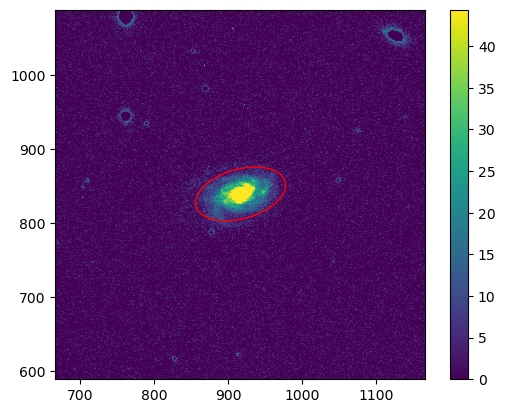

In [43]:
fig, ax = plt.subplots()
im=ax.imshow(test-bkg_med,vmin=0,vmax=bkg_med,cmap='viridis')
fig.colorbar(im)
e_app = Ellipse(xy=(x, y),
                width=2.5*kronrad*a,
                height=2.5*kronrad*b,
                angle=theta*(180/np.pi))
e_app.set_facecolor('none')
e_app.set_edgecolor('red')
ax.add_artist(e_app)
plt.ylim(int(y)-250,int(y)+250)
plt.xlim(int(x)-250,int(x)+250)

# Reference Star Diagnostics #

(0.0, 2048.0)

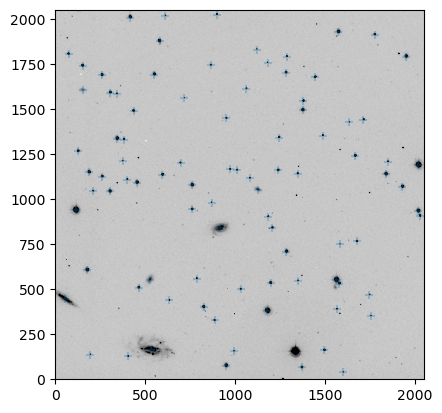

In [44]:
plt.imshow(image,vmin=0.5*bkg_med,vmax=2*bkg_med,cmap='Greys')
plt.scatter([el[0] for el in positions],[el[1] for el in positions],marker='+',alpha=0.3)
plt.ylim(0, image.shape[0])
plt.xlim(0, image.shape[1])

In [45]:
radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
apertures = [CircularAperture(positions, r=r) for r in radii]
phot_table = aperture_photometry(image, apertures)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'
#print(phot_table)

In [46]:
annulus_aperture =CircularAnnulus(positions, r_in=12., r_out=15.)
bkg_table = aperture_photometry(image, annulus_aperture)
for col in bkg_table.colnames:
    bkg_table[col].info.format = '%.8g'
#print(bkg_table)


In [47]:
ref_bkg_mean = bkg_table['aperture_sum'] / annulus_aperture.area
snr = np.array([])
snr1=[]
index = 0
for col in phot_table.colnames[3:]:
    ref_bkg_total = ref_bkg_mean * apertures[index].area
    net_star = phot_table[col] - ref_bkg_total
    snr_arr=net_star/np.sqrt(net_star+ref_bkg_total)
    snr1.append(snr_arr)
    snr = np.append(snr, net_star / np.sqrt(net_star + ref_bkg_total))
    index += 1

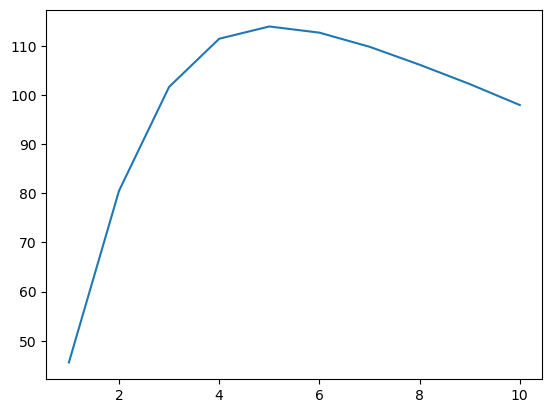

In [48]:
plt.plot(radii,[np.median(el) for el in snr1])

In [49]:
print(radii[np.argmax([np.median(el) for el in snr1])])
circ_ap =CircularAperture(positions, r=radii[np.argmax([np.median(el) for el in snr1])])
#circ_ap =CircularAperture(positions, r=10)
annulus_ap = CircularAnnulus(positions, r_in=12., r_out=15.)
aps=[circ_ap,annulus_ap]
phot_table = aperture_photometry(image, aps)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'
ref_bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
print(np.median(ref_bkg_mean))
ref_bkg_total=ref_bkg_mean*circ_ap.area
adjusted_bkg_total=ref_bkg_mean*aper.area_overlap(image,mask=mask)
net_star=phot_table['aperture_sum_0']-ref_bkg_total
adjusted_net_star=phot_table['aperture_sum_0']*(aper.area_overlap(image,mask=mask)/circ_ap.area)-adjusted_bkg_total
#inst_mags=-2.5*np.log10(adjusted_net_star)
snr_arr=net_star/np.sqrt(net_star+ref_bkg_total)
inst_mags=-2.5*np.log10(net_star)
#snr_arr=net_star/np.sqrt(net_star+ref_bkg_total)
#print(inst_mags)
print(np.median(snr_arr))
print(np.mean(snr_arr))
print(np.max(snr_arr))
print(np.argmin(snr_arr))
print(np.min(snr_arr))
#print(phot_table)

5
45.88367419401411
113.9668425822224
180.0573843886491
1129.9843011197013
84
24.220039847338626


In [50]:
print(len(inst_mags))
print(len(Ref_mags))
print(len(snr_arr))
print(len(dRef_mags))
for num,el in enumerate(dRef_mags):
    if el==0:
        dRef_mags[num]=np.max(dRef_mags)
        print('test')
print(np.min(dRef_mags))

90
90
90
90
0.003


In [51]:
model=odr.Model(Linfunc)
mydata = odr.RealData(inst_mags, Ref_mags, sx=1/snr_arr, sy=dRef_mags)
myodr = odr.ODR(mydata, model, beta0=[27])
myoutput = myodr.run()
myoutput.pprint()

Beta: [26.60792002]
Beta Std Error: [0.04316342]
Beta Covariance: [[3.94493472e-05]]
Residual Variance: 47.22716385657844
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


26.689564425807998
26.58934110670443
m= 13.816891680676955
dm= 0.04403425411376282


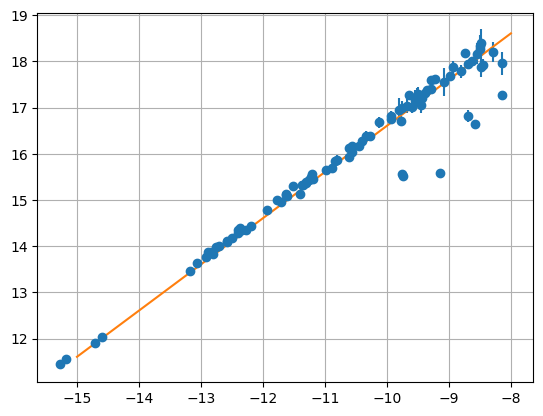

In [52]:
plt.errorbar(inst_mags,Ref_mags,xerr=(1/snr_arr), yerr=dRef_mags,fmt='o')
test_space=np.linspace(-15,-8,100)
plt.plot(test_space,Linfunc(myoutput.beta,test_space))
plt.grid(True)
print(np.nanmedian(Ref_mags-inst_mags))
print(np.nanmean(Ref_mags-inst_mags))
print('m=',Linfunc(myoutput.beta,-2.5*np.log10(net)))
print('dm=',np.sqrt((1/SN_gal)**2+myoutput.sd_beta[0]**2))
#print(-2.5*np.log10(net))